In [34]:
import mysql
import mysql.connector

import pandas as pd
from pandas import DataFrame
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
listaCandidatos = []
listaCandidatos.append(['Podemos','Álvaro Dias','Alvaro','Alvaro','Alvaro Dias'])
listaCandidatos.append(['Patriota','Cabo Daciolo','Daciolo','Cabo','Cabo Daciolo'])
listaCandidatos.append(['PDT','Ciro Gomes','Ciro','Ciro Gomes','Ciro Gomes'])
listaCandidatos.append(['PSDB','Geraldo Alckmin','Alckmin','Alckmin','Geraldo Alckmin'])
listaCandidatos.append(['PSOL','Guilherme Boulos','Boulos','Guilherme','Guilherme Boulos'])
listaCandidatos.append(['MDB','Henrique Meirelles','Henrique','Meirelles','Henrique Meirelles'])
listaCandidatos.append(['PSL','Jair Bolsonaro','Jair','Bolsonaro','Bolsomito'])
listaCandidatos.append(['Partido Novo','João Amoêdo','Amoedo','Joao Amoedo','João Amoedo'])
listaCandidatos.append(['PPL','João Goulart Filho','Goulart','Joao Goulart','João Goulart Filho'])
listaCandidatos.append(['DC','José Maria Eymael','Eymael','Jose Maria Eymael','José Maria Eymael'])
listaCandidatos.append(['PT','Luiz Inácio Lula da Silva','Lula','Luiz Inácio Lula da Silva','Luiz Inacio'])
listaCandidatos.append(['Rede','Marina Silva','Marina','Marina Silva','Marina Silva'])
listaCandidatos.append(['PSTU','Vera Lúcia','Verla Lucia','Vera Lúcia','Vera Lúcia'])

In [36]:
#Classe de conexao ao banco de dados mysql
class bancoMysql():
    def __init__(self):
        global cnx
        
    def abreConexao(self):
        import mysql

        #configuração do servidor
        config = {
            'user': 'root',
            'password': '12345678',
            'host': 'localhost',
            'database': 'eleicoes',
            'raise_on_warnings': True,
        }    
        #conectando na base
        self.cnx = mysql.connector.connect(**config)
        
    def executaQueryGenerica(self,cnx,sqlQuery,parametros):
        #cria cursor para execução e parse
        cursor = self.cnx.cursor()
        cursor.execute(sqlQuery,parametros)
        self.cnx.commit()
        cursor.close()
        return True;        
    
    def getAllRows(self,sql,parametros):
        cursor = self.cnx.cursor(dictionary=True)
        query = (sql)
        cursor.execute(query,parametros)
        arrDados = cursor.fetchall()
        cursor.close()
        return arrDados

    def fechaConexao(self):
        self.cnx.close()   

In [37]:
objBanco = bancoMysql()
objBanco.abreConexao()

In [38]:
sql = """
        SELECT
            date_format(T1.dt_cadastro, '%Y%m%d%H') dt_cadastro_f,
            SUBSTR(t1.twitter,56,19) AS ID_TWITTER,
            t1.twitter
        FROM 
            eleicoes.tb_twitter t1
"""
parametros = ()

In [39]:
arrDados = objBanco.getAllRows(sql,parametros)
objBanco.fechaConexao()

In [40]:
arrTwiiterText = []
for rowDados in arrDados:
    twitter = json.loads(rowDados['twitter'])
    arrTwiiterText.append(twitter['text'])

In [41]:
listaCometarios = []

for rowCandidato in listaCandidatos:
    
    #print(rowCandidato[1] + ' - ' + rowCandidato[0])
    #for rowTwiiterText in arrTwiiterText:
    for rowTwiiterText in arrTwiiterText:
        x = 0
        textoTwitter = rowTwiiterText.upper()
        nome1 = rowCandidato[1]
        nome1 = nome1.upper()
        find1 = textoTwitter.find(nome1)

        nome2 = rowCandidato[2]
        nome2 = nome2.upper()
        find2 = textoTwitter.find(nome2)

        nome3 = rowCandidato[3]
        nome3 = nome3.upper()
        find3 = textoTwitter.find(nome3)

        nome4 = rowCandidato[4]
        nome4 = nome4.upper()
        find4 = textoTwitter.find(nome4)

        if (find1 >= 0):
            x = 1
        if (find2 >= 0):
            x = 1
        if (find3 >= 0):
            x = 1
        if (find4 >= 0):
            x = 1

        if (x > 0):
            listaCometarios.append([rowCandidato[0],rowCandidato[1],1])


In [42]:
listaCandidatoComentario = []
x = 0
total = 0

for rowCandidato in listaCandidatos:
    listaCandidatoComentario.append([rowCandidato[0],rowCandidato[1],0])
    
    for rowComentario in listaCometarios:
        if (rowCandidato[1] == rowComentario[1]):            
            listaCandidatoComentario[x][2] += 1  
            total += 1
    x += 1

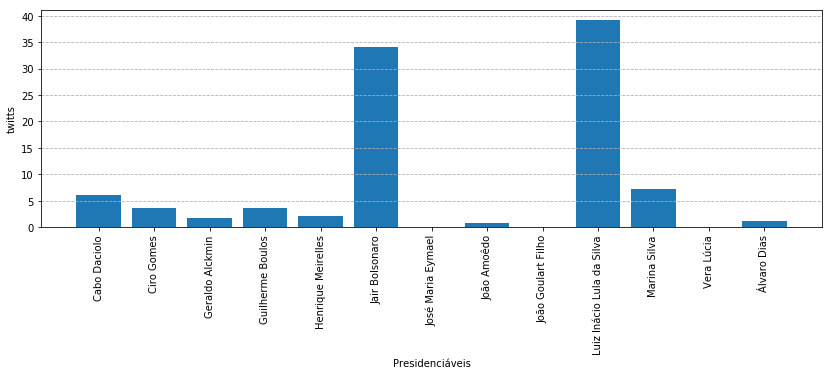

In [43]:
gY = []
gX = []
for rowDados in listaCandidatoComentario:
    gX.append(rowDados[1])
    gY.append((rowDados[2] / total) * 100)

axes = plt.subplots(1, figsize=(14,4))

plt.xlabel('Presidenciáveis')
plt.ylabel('twitts')
plt.bar(gX, gY)

plt.xticks(rotation=90)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

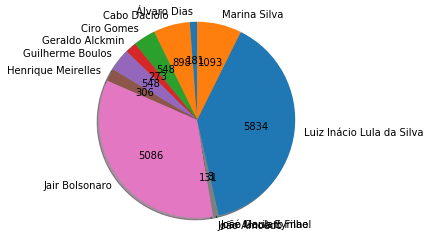

In [44]:
labels = []
titulos = []

for rowDados in listaCandidatoComentario:
    if (rowDados[2] > 0):
        labels.append(rowDados[1])
        titulos.append(rowDados[2])

cores = ['lightblue', 'green', 'white', 'red','lightblue', 'green', 'white', 'red','lightblue', 'green', 'white', 'red','green']
explode = (0,0,0)  # somente explode primeiro pedaço
total
plt.pie(titulos, labels=labels, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)

# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()